#DATA SCIENCE INTERN AT LET'S GROW MORE(LGM)

##Author : Shuvam Chakraborty

#Intermediate Level Task-2

#Prediction Using Decision Tree Algorithm

**Dataset Link**:- https://bit.ly/3kXTdox

> 

**Dataset Drive Link**:- https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

###Importing Necessary Libraries

In [ ]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

###Loading Dataset

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'11Iq7YvbWZbt8VXjfm06brx66b10YiwK-'})

In [ ]:
fileDownloaded.GetContentFile('Iris.csv')

In [ ]:
ds = pd.read_csv('Iris.csv')

###Data Anaysis

In [ ]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
ds.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
ds.shape

(150, 6)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Count of Species
ds['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

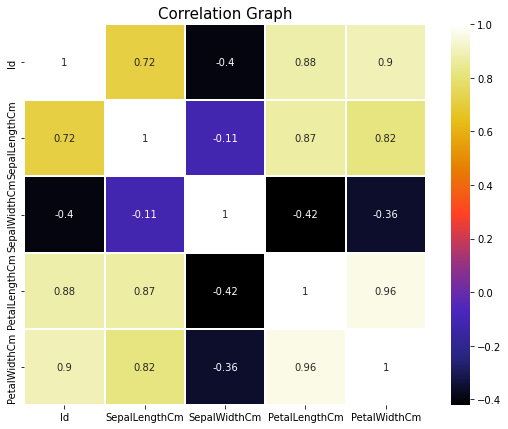

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(ds.corr(),cmap='CMRmap',annot=True,linewidths=1)
plt.title("Correlation Graph",size=15)
plt.show()

###Defining Dependent and Independent Variables

In [ ]:
#Dependent and Independent Variable
f = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = ds.loc[:, f].values   #defining the feature matrix
Y = ds.Species

###Splitting Dataset into training and test dataset

In [ ]:
#Splitting Dataset
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25,random_state=0)

###Defining decision tree classsifier and fitting the training set

In [ ]:
#Defining decision tree classsifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(trainX,trainY)

DecisionTreeClassifier()

###Visualizing Decision Tree

[Text(0.4, 0.9, 'PetalLengthCm <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalLengthCm <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'PetalWidthCm <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'PetalLengthCm <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'SepalLengthCm <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1,

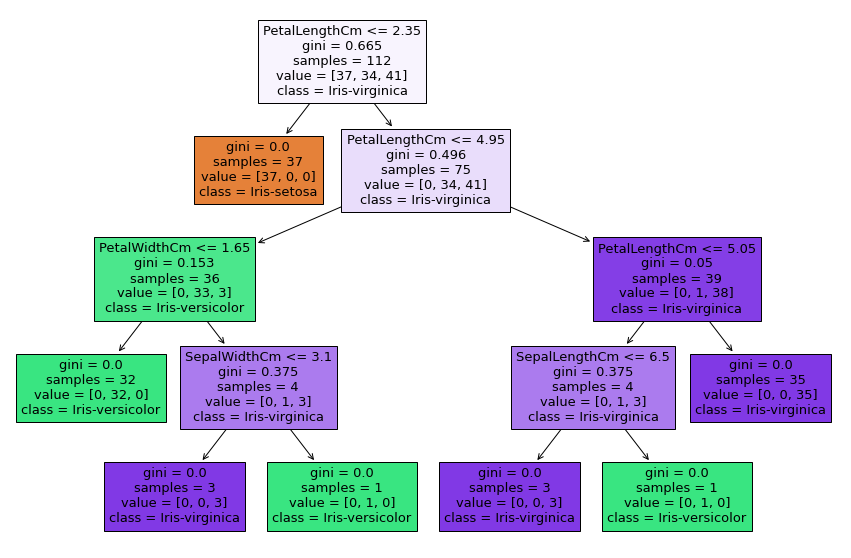

In [ ]:
#Visualizing Decision Tree
clsname= ds.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = f, class_names= clsname)

###Prediction On Test Data

In [ ]:
#Prediction On Test Data
PredY = dtree.predict(testX)
print(PredY)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


###Accuracy Of The Model

In [ ]:
#Accuracy Of The Model
print("Accuracy(in Percentage):",metrics.accuracy_score(testY, PredY)*100)

Accuracy(in Percentage): 97.36842105263158


In [ ]:
confusion_matrix(testY, PredY)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

###Accuracy of Decision Tree Algorithm is -> 97.37% (approximately)

#Thank You Let's Grow More(LGM)